## Synthetic Minority Oversampling Technique (SMOTE)

El desbalance de clases al momento de entrenar un modelo de predicción puede ser crucial, al haber un desbalance el modelo se inclinará por la clase mayoritaria, ya que es lo más probable que suceda, y tendrá un rendimiento deficiente con la clase minoritaria, en algunos casos puede que la clase minoritaria sea la más importante para la clasificación.

Un enfoque para abordar conjuntos de datos desbalanceados es sobremuestrear (**oversampling**) la clase minoritaria. El enfoque más simple consiste en duplicar instancias en la clase minoritaria, aunque estos ejemplos no agregan ninguna información nueva al modelo.

En su lugar, se pueden sintetizar nuevas instancias a partir de los ejemplos existentes. Este es un tipo de aumento de datos (**data augmentation**) para la clase minoritaria y se conoce como **`Synthetic Minority Oversampling Technique`** (Técnica de sobremuestreo de minorías sintéticas)

Otro enfoque sería el de eliminar aleatoriamente instancias de la clase mayoritaria (**undersampling**)


#### Sampling:

- **Undersampling:** remover algunos patrones de la clase mayoritaria.

- **Oversampling:** crear patrones sintéticos que se agregan a la clase minoritaria.

- **Híbrido:** combinar **undersampling** y **oversampling**.


- Vamos a utilizar la libreria **imblearn**:

```python
pip install imbalanced-learn
```

### Algoritmo SMOTE


**1.** Elegir un patrón de la clase minoritaria al azar.

**2.** Encontrar los k-vecinos más cercanos del patrón elegido anteriormente.

**3.** Seleccionar un vecino al azar y crear un patrón sintético en un punto al azar entre el patrón elegido al inicio y un vecino seleccionado al azar. 

In [10]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn.preprocessing import MinMaxScaler

import imblearn # Para ver la versión

In [11]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"imbalanced-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1
imbalanced-learn==1.5.1


In [18]:
# Crea un dataset artificial 

from sklearn.datasets import make_classification

X, y = make_classification(n_samples            = 600,
                           n_features           = 2,
                           n_redundant          = 0,
                           n_clusters_per_class = 1,
                           weights              = [0.9, 0.10],
                           random_state         = 5)

In [19]:
from collections import Counter

Counter(y)

Counter({0: 538, 1: 62})

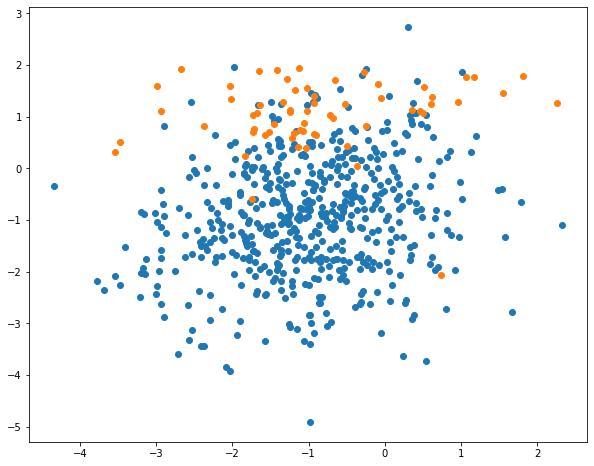

In [20]:
plt.figure(figsize = (10, 8))

# Puntos Clase 0 (mayoritaria)
plt.scatter(X[np.where(y == 0)[0], 0], X[np.where(y == 0), 1])

# Puntos Clase 1 (minoritaria)
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1), 1])

plt.show()

### SMOTE (oversampling)

In [21]:
# Escalado de datos
#x_scaler = MinMaxScaler()
#X = x_scaler.fit_transform(X)

In [23]:
from imblearn.over_sampling import SMOTE 

oversampling = SMOTE()
X_balanceado, y_balanceado = oversampling.fit_resample(X, y) # Se obtienen nuevos X e y

In [24]:
Counter(y_balanceado)

Counter({0: 538, 1: 538})

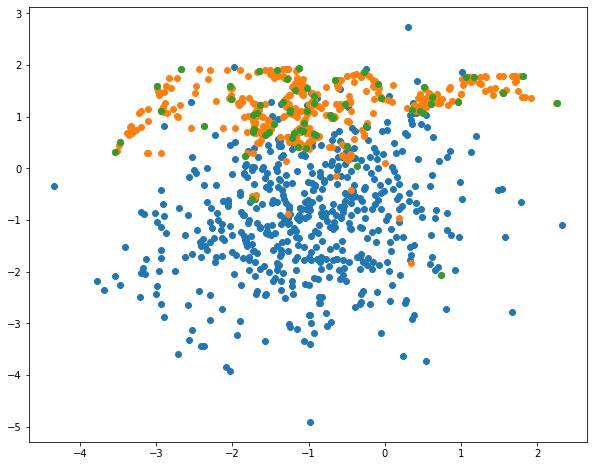

In [25]:
plt.figure(figsize = (10, 8))

# Nuevos puntos, creados sinteticamente

# Puntos Clase 0
plt.scatter(X_balanceado[np.where(y_balanceado == 0)[0], 0], X_balanceado[np.where(y_balanceado == 0), 1])

# Puntos Clase 1 (SOMTE)
plt.scatter(X_balanceado[np.where(y_balanceado == 1)[0], 0], X_balanceado[np.where(y_balanceado == 1), 1])

# Puntos Clase 1 (originales)
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1), 1])

plt.show()

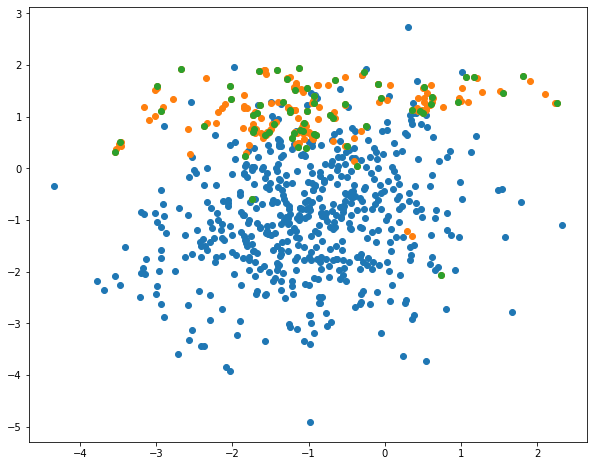

In [28]:
# Podemos elegir el porcentaje de la clase mayoritaria que se agrege a la clase minoritaría 

oversampling = SMOTE(sampling_strategy = 0.4)  # Queremos un 80% del tamaño de la clase mayoritaria
X_balanceado, y_balanceado = oversampling.fit_resample(X, y) # Se obtienen nuevos X e y


# Plot
plt.figure(figsize = (10, 8))

# Puntos Clase 0
plt.scatter(X_balanceado[np.where(y_balanceado == 0)[0], 0], X_balanceado[np.where(y_balanceado == 0), 1])

# Puntos Clase 1 (SOMTE)
plt.scatter(X_balanceado[np.where(y_balanceado == 1)[0], 0], X_balanceado[np.where(y_balanceado == 1), 1])

# Puntos Clase 1 (originales)
plt.scatter(X[np.where(y == 1)[0], 0], X[np.where(y == 1), 1])

plt.show()

In [29]:
Counter(y_balanceado) # 430 es un 80% de 538

Counter({0: 538, 1: 215})

### Undersampling

In [32]:
X.shape, y.shape

((600, 2), (600,))

In [33]:
Counter(y)

Counter({0: 538, 1: 62})

In [35]:
from imblearn.under_sampling import RandomUnderSampler

undersampling = RandomUnderSampler(sampling_strategy = 0.20) # Especificamos que la clase minoritaria represente el 20% de la clase mayoritaria
X_balanceado, y_balanceado = undersampling.fit_resample(X, y) # Se obtienen nuevos X e y

In [36]:
Counter(y_balanceado)

Counter({0: 310, 1: 62})

In [37]:
310*0.2

62.0

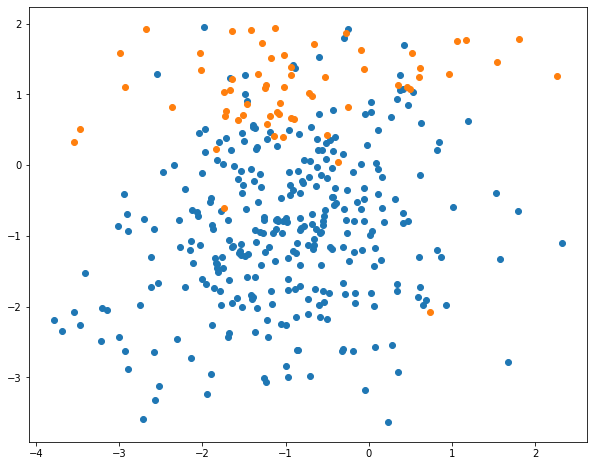

In [38]:
plt.figure(figsize = (10, 8))

# Nuevos puntos, creados sinteticamente

# Puntos Clase 0 (Undersampling)
plt.scatter(X_balanceado[np.where(y_balanceado == 0)[0], 0], X_balanceado[np.where(y_balanceado == 0), 1])

# Puntos Clase 1
plt.scatter(X_balanceado[np.where(y_balanceado == 1)[0], 0], X_balanceado[np.where(y_balanceado == 1), 1])

plt.show()

In [ ]:
oversampling = SMOTE()
X_balanceado, y_balanceado = oversampling.fit_resample(X, y) # Se obtienen nuevos X e y

In [ ]:
class SmoteCasero:
    def __init__(self, k = 5):
        self.k = k

    def fit(self):
        pass

    def resample(self):
        # Todo esto, lo haremos utilizando NUMPY (no pandas)
        
        # Ver cual es la clase minoritaria y cuantas intancias debo agregar
        # Ej: tengo 200 vs 30, debo agregar 170 elementos.

        # Por cada una de estas 170 veces
        # Elegir un elemento aleatorio
        # Buscar sus n vecinos...
        # Elegir uno aleatoriamente
        # Sacar un número entre 0 y 1
        # Buscar el nuevo punto a crear y agregarlo.

        
        pass

    def fit_resample(self, X, y):
        pass

In [ ]:
################################################################################################################################